# Quatitative Evaluation

Flipping the top pixels and see how much logodds drop in terms of the top-1 classification error.

In [1]:
%matplotlib inline
import torch
import os
import pandas as pd
import seaborn as sns

Take out all the files end with 'records.th'

In [2]:
def get_file_names(directory):
    directory = os.path.join('../result', directory)
    result = []
    for filename in os.listdir(directory):
        if filename.endswith("records.th"): 
            result.append(filename)
    return result

In [3]:
arr = []
identifiers = ['1013-vbd_l1_opposite-0.1']
for directory in identifiers:
    filenames = get_file_names(directory)
    arr.append(filenames)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_given_file(ax, filepath, name):
    orig_log_odds, all_log_odds, unnormalized_img, imp_vector, rodds = \
        torch.load(filepath)
    x_flip = np.array([0] + all_log_odds.keys())
    y_flip = np.array([orig_log_odds] + all_log_odds.values())

    ax.plot(x_flip, y_flip, label='{} flip'.format(name))
    
    if 'p_b' not in name:
        x = [k for k, v in rodds]
        y = np.array([v for k, v in rodds])
        ax.scatter(x, y, label='{} random'.format(name))
    return unnormalized_img

# Summary

## Flip 8

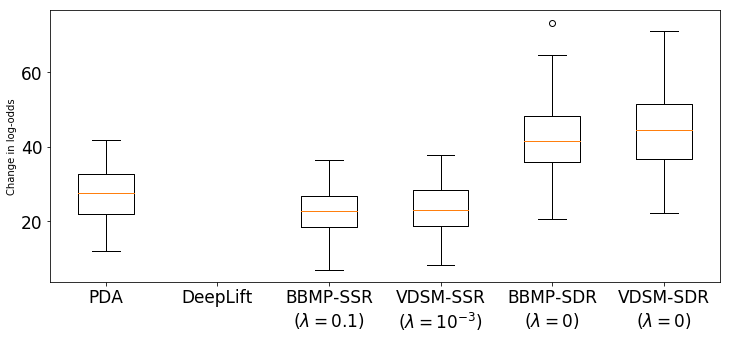

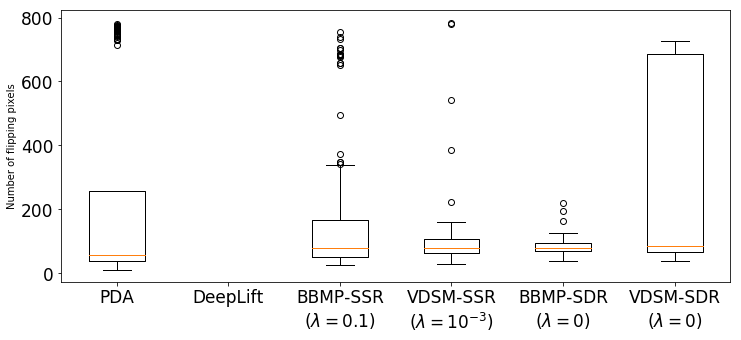

In [6]:
import operator
method_names = [
    ('PDA', '1018-8-p_b'),
    ('DeepLift', ''),
    ('BBMP-SSR\n($\lambda=0.1$)', '1018-8-bbmp-ssr-0.1'),
    ('VDSM-SSR\n($\lambda=10^{-3}$)', '1018-8-vbd_l1-1E-3'),
    ('BBMP-SDR\n($\lambda=0$)', '1018-8-bbmp-sdr-0'),
    ('VDSM-SDR\n($\lambda=0$)', '1018-8-vbd_l1_opposite-0'),
]

scores_to_plot = []
num_pixels_used = []

for name, dir_name in method_names:
    files = get_file_names(dir_name)
    
    arr = []
    arr2 = []
    for f in files:
        orig_log_odds, all_log_odds, unnormalized_img, imp_vector, rodds = \
            torch.load(os.path.join('../result', dir_name, f))
        
        max_num_pixels, max_vals = max(all_log_odds.iteritems(), key=operator.itemgetter(1))
        arr.append(max_vals - orig_log_odds)
        arr2.append(max_num_pixels)
    scores_to_plot.append(arr)
    num_pixels_used.append(arr2)

def plot_box_plot(the_arr, short_names, ylabel='Change in log-odds'):
    fig, ax = plt.subplots(figsize=(2*len(the_arr),5))

    ax.boxplot(the_arr, widths=[0.5 for x in the_arr])
    ax.set_ylabel(ylabel)

    ax.set_xticklabels(short_names)

    # plt.title(str(original_class)+" --> "+str(target_class), fontsize=24)
    plt.tick_params(labelsize=17)
    plt.show()

short_names = [x[0] for x in method_names]
plot_box_plot(scores_to_plot, short_names)
plot_box_plot(num_pixels_used, short_names, ylabel='Number of flipping pixels')

## Flip 8 to 3

In [1]:
import operator
method_names = [
    ('Perturbation', '1013-p_b'),
    ('DeepLift', ''),
    ('BBMP-SSR', '1018-bbmp-ssr-0.1'),
    ('VBD-SSR', '1018-vbd_l1-1E-3'),
    ('BBMP-SDR', '1018-bbmp-sdr-0'),
    ('VBD-SDR', '1013-vbd_l1_opposite-0'),
]

def plot_box_plot(method_names, from_class=8, to_class=3, total_imgs=100):
    scores_to_plot = []
    num_pixels_used = []

    for name, dir_name in method_names:
        if name == 'DeepLift':
            scores = torch.load('../result/1018-deeplift/mnist_deeplift_scores.pth')
            log_odds, y_test = torch.load(file_path)

            total_imgs = 100

            real_idx = np.arange(10000)[y_test == from_class][:total_imgs]

            imp_vector = log_odds[from_class][real_idx] - log_odds[to_class][real_idx]

            all_log_odds = get_all_log_odds(imp_vector, unnormalized_img, interpret_net, 
                                            from_class=from_class, to_class=to_class)
        else:
            files = get_file_names(dir_name)

            arr = []
            arr2 = []
            for f in files:
                orig_log_odds, all_log_odds, unnormalized_img, imp_vector, rodds = \
                    torch.load(os.path.join('../result', dir_name, f))

                max_num_pixels, max_vals = max(all_log_odds.iteritems(), key=operator.itemgetter(1))
                arr.append(max_vals - orig_log_odds)
                arr2.append(max_num_pixels)
            scores_to_plot.append(arr)
            num_pixels_used.append(arr2)

def plot_box_plot(the_arr, short_names, ylabel='Change in log-odds'):
    fig, ax = plt.subplots(figsize=(2*len(the_arr),5))

    ax.boxplot(the_arr, widths=[0.5 for x in the_arr])
    ax.set_ylabel(ylabel)

    ax.set_xticklabels(short_names)

    # plt.title(str(original_class)+" --> "+str(target_class), fontsize=24)
    plt.tick_params(labelsize=17)
    plt.show()

short_names = [x[0] for x in method_names]
plot_box_plot(scores_to_plot, short_names)
plot_box_plot(num_pixels_used, short_names, ylabel='Number of flipping pixels')

NameError: name 'scores_to_plot' is not defined

## VBDL1 hyperparameter search
- Seems 0 is the best?

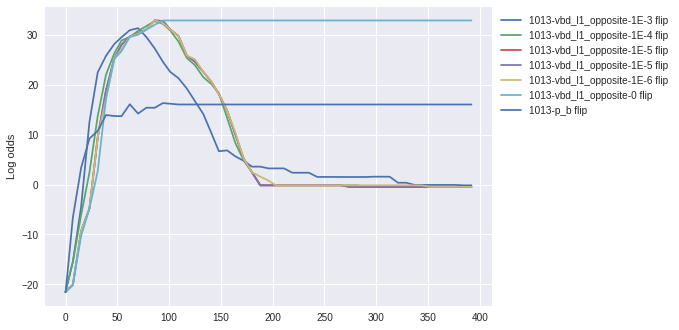

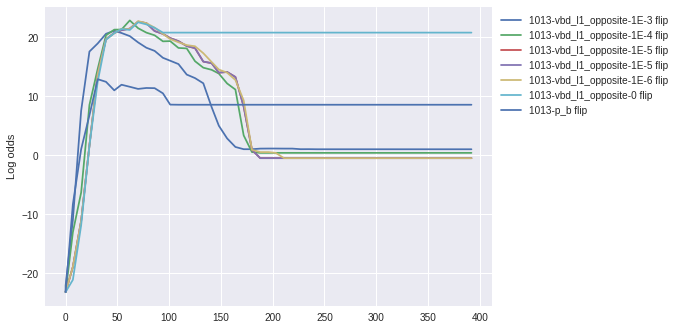

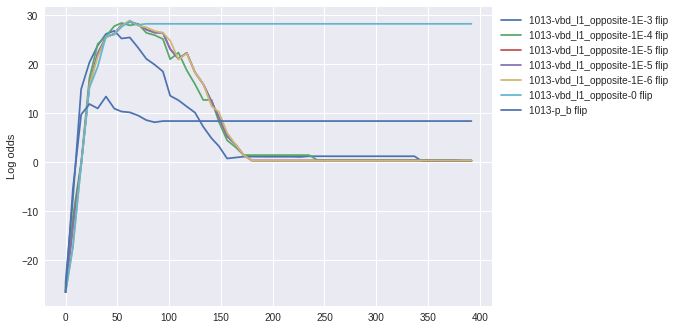

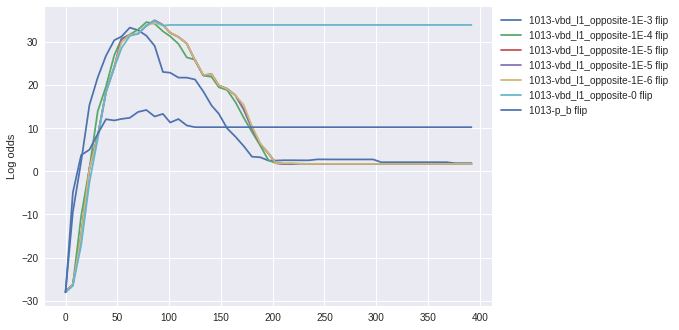

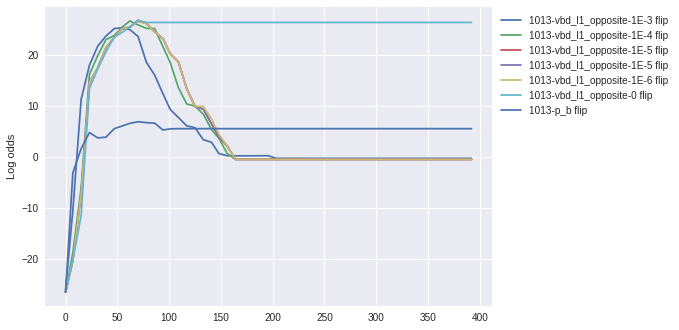

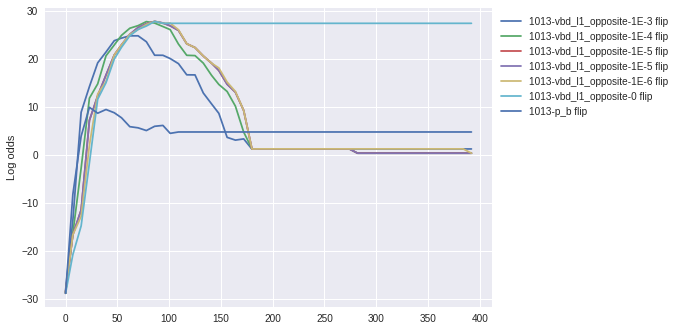

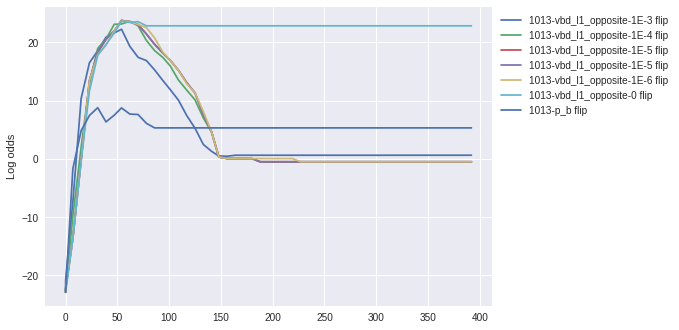

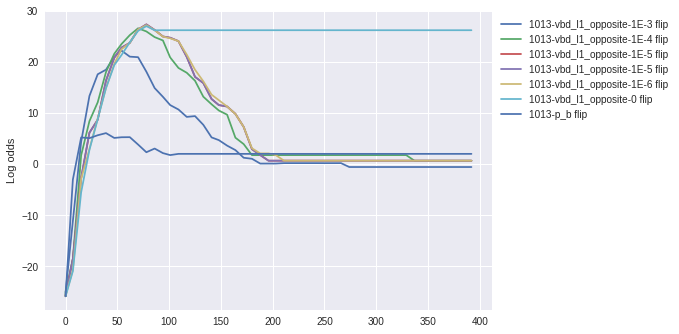

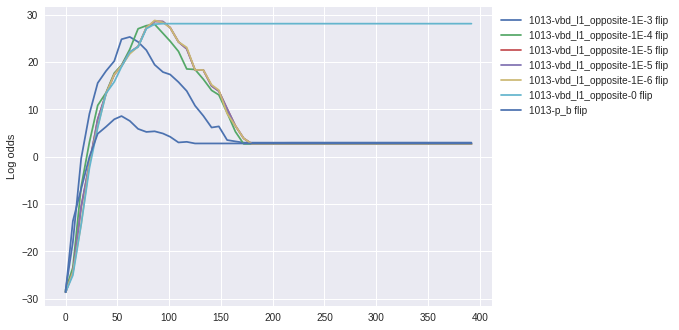

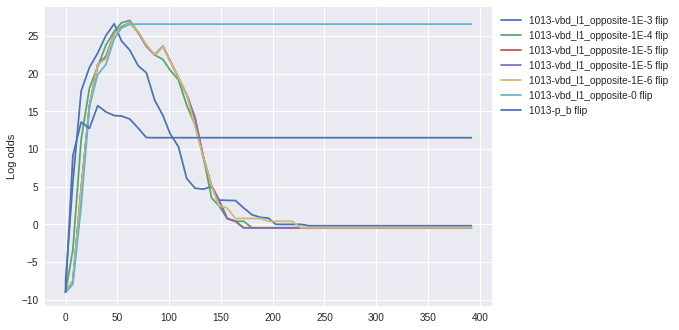

In [13]:
for idx in xrange(10):
    fig, ax = plt.subplots()
    for name in [
#         '1013-vbd_l1_opposite-0.1/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-1E-3/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-1E-4/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-1E-5/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-1E-5/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-1E-6/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        #                  '1013-vbd_opposite-0.5-1.0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## BBMP search
- Looks like 0 can reach the highest point, but not the fastest

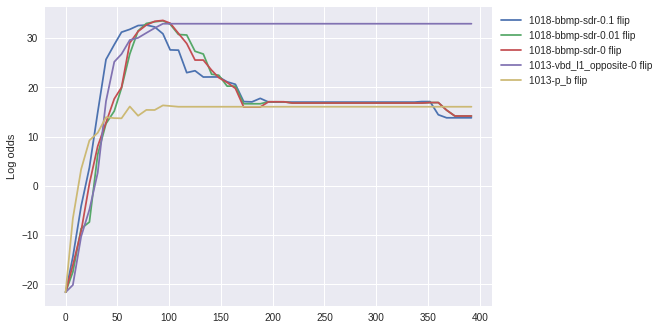

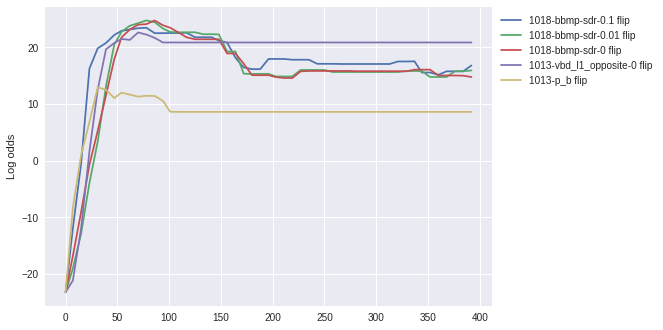

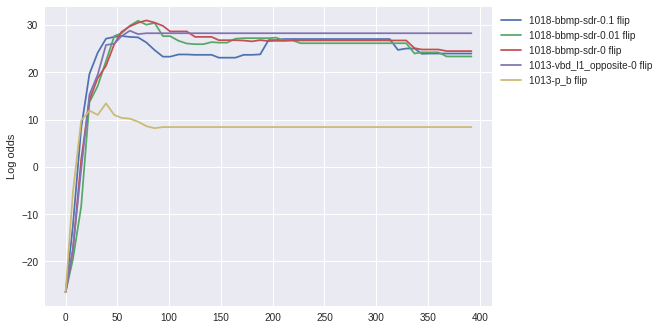

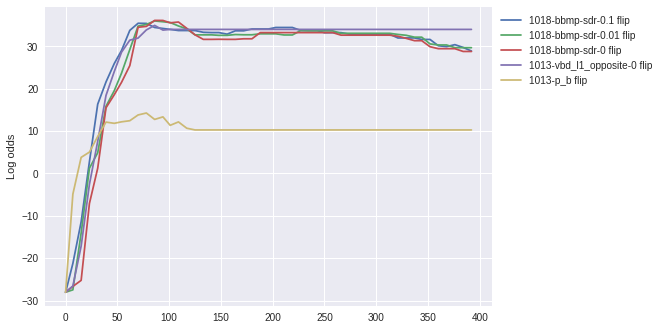

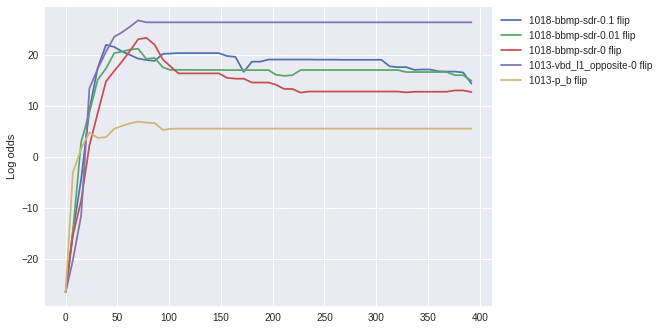

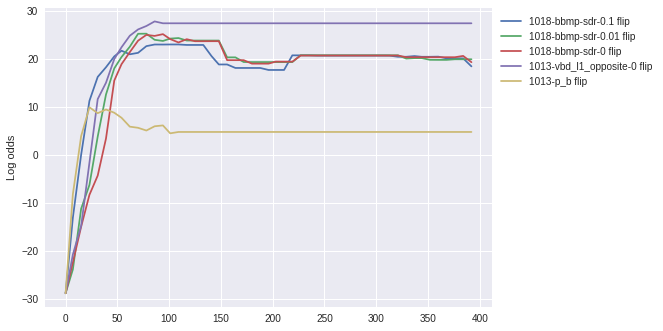

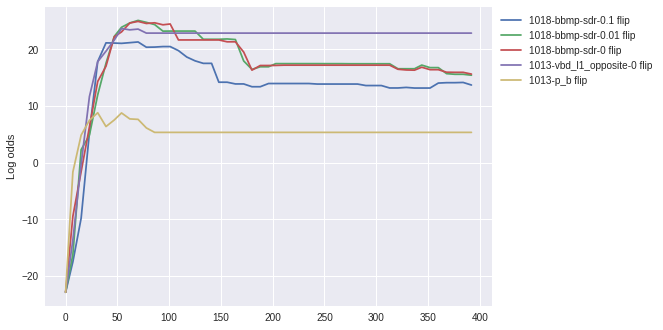

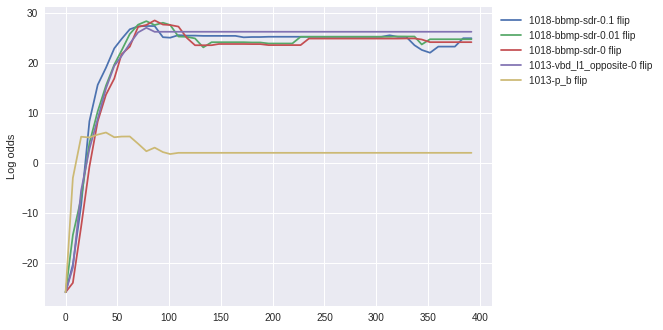

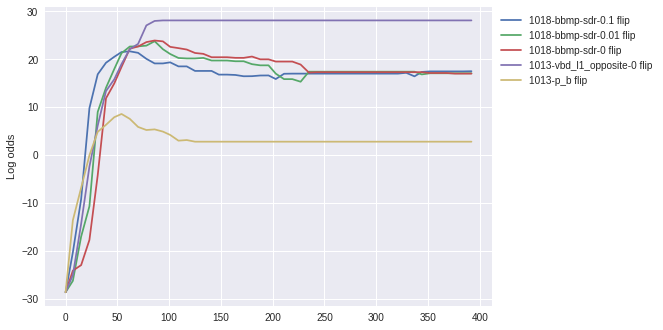

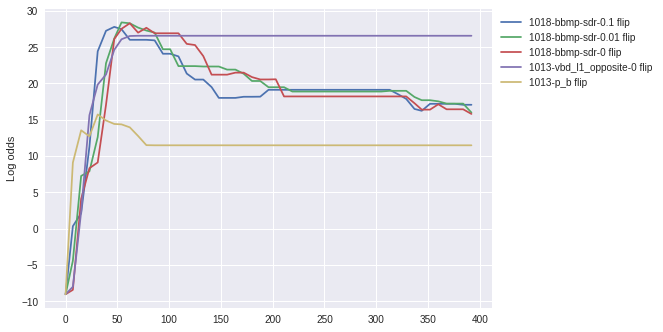

In [17]:
for idx in xrange(10):
    fig, ax = plt.subplots()
    for name in [
#         '1018-bbmp-sdr-1E-1/8_{}_records.th'.format(idx),
        '1018-bbmp-sdr-0.1/8_{}_records.th'.format(idx),
        '1018-bbmp-sdr-0.01/8_{}_records.th'.format(idx),
        '1018-bbmp-sdr-0/8_{}_records.th'.format(idx),
        '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## BBMP-SSR
0.1 seems the best

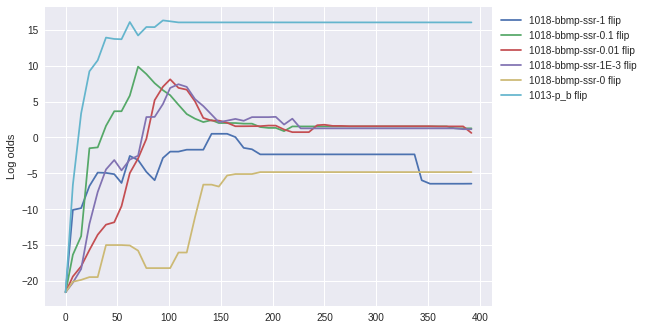

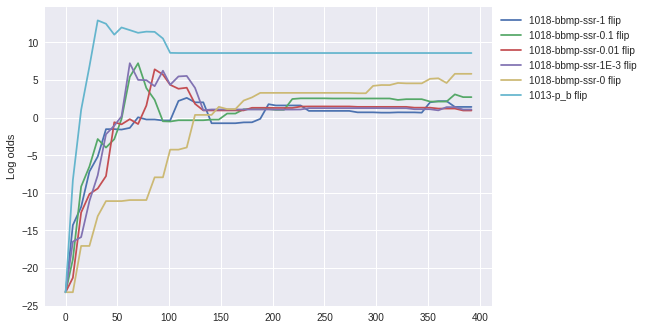

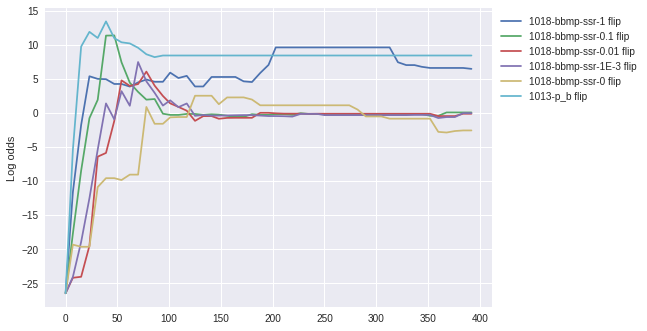

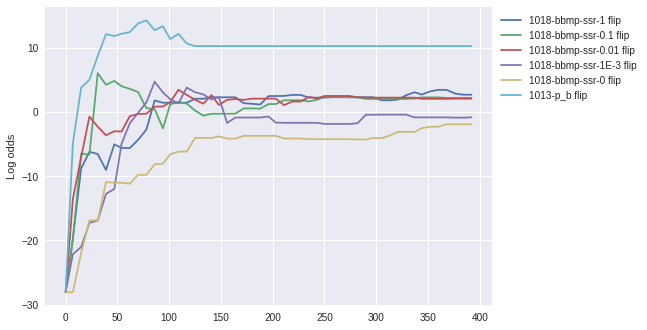

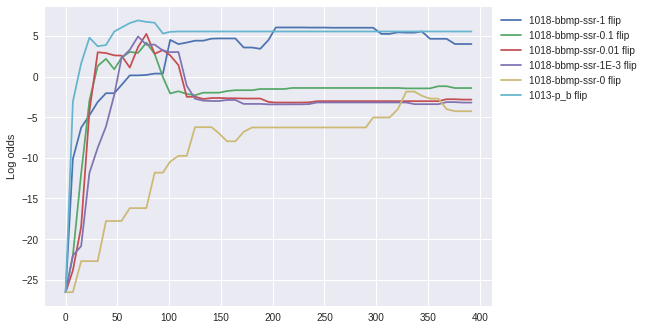

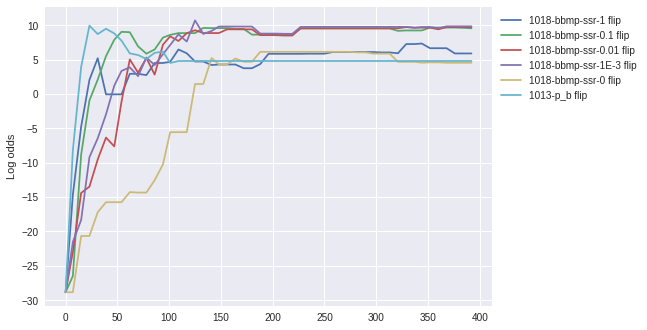

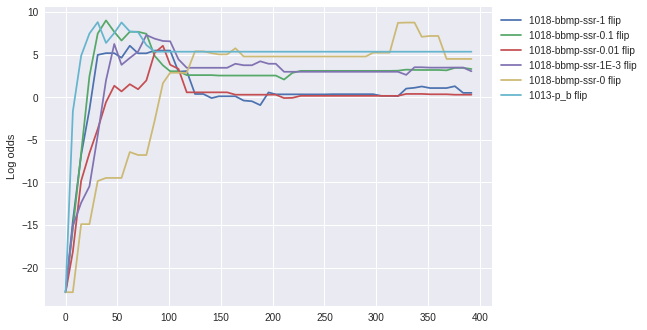

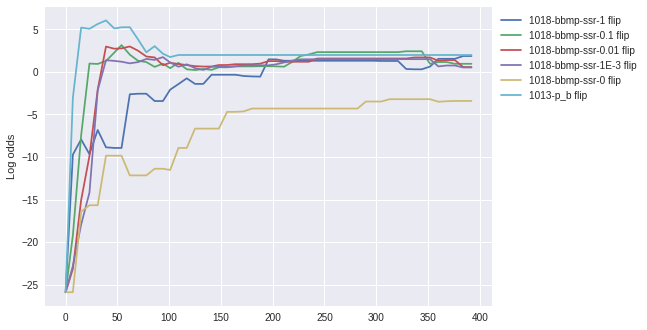

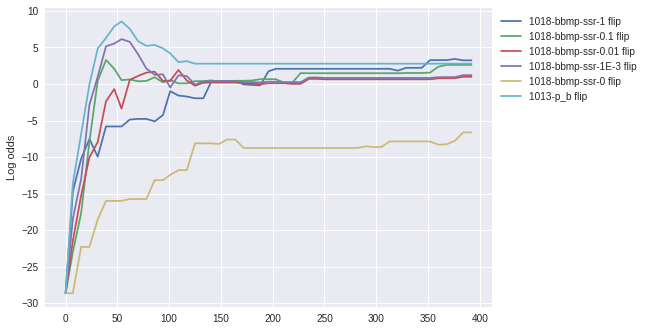

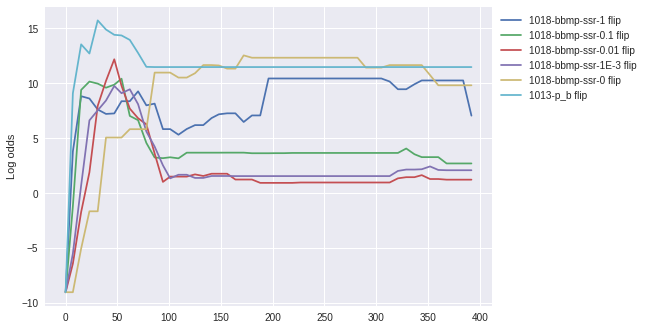

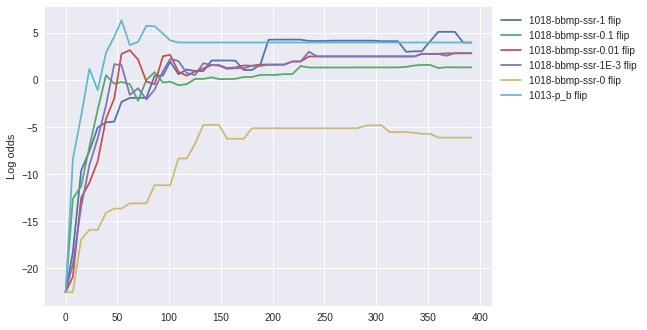

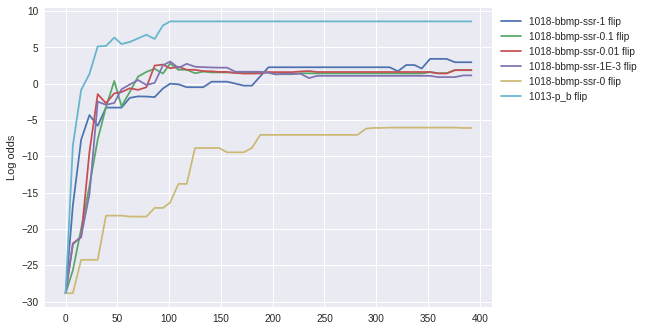

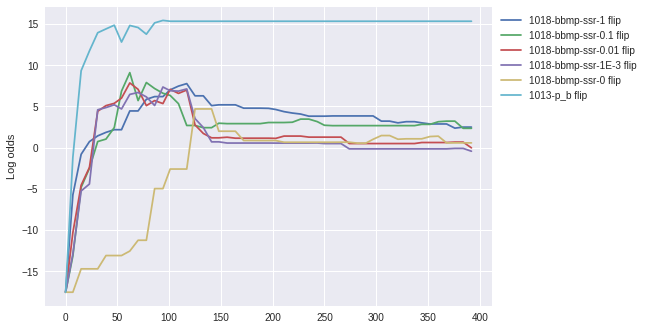

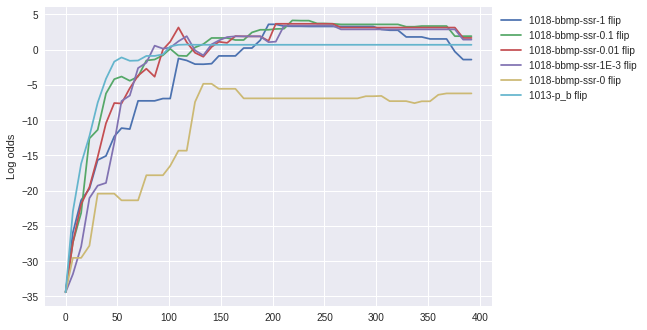

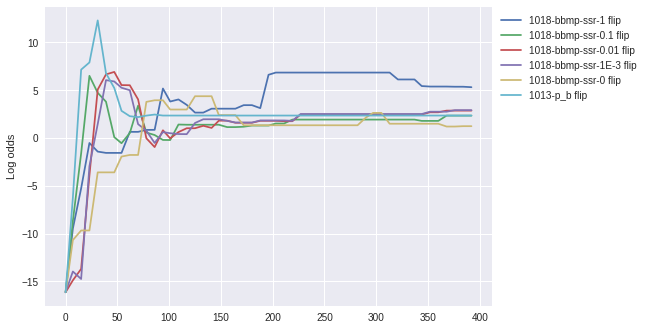

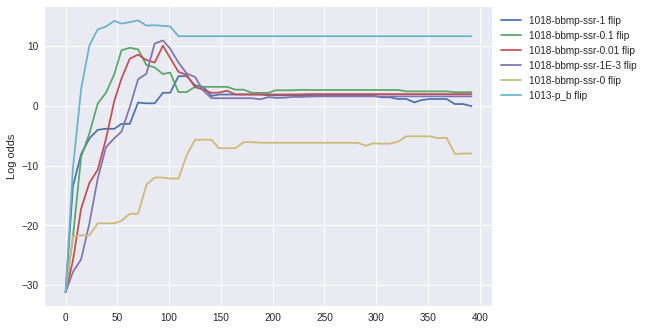

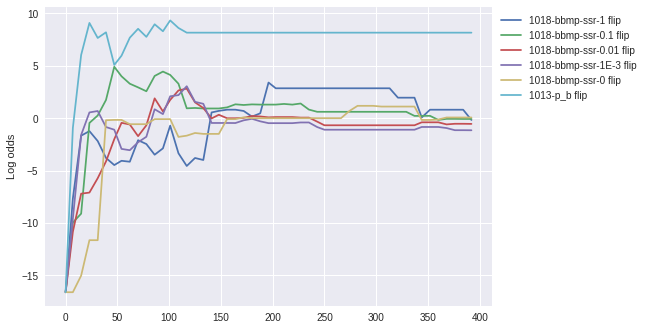

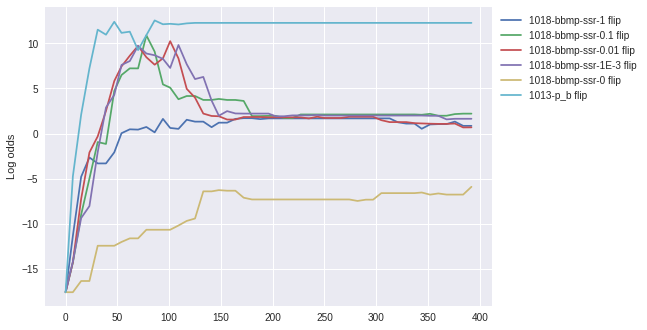

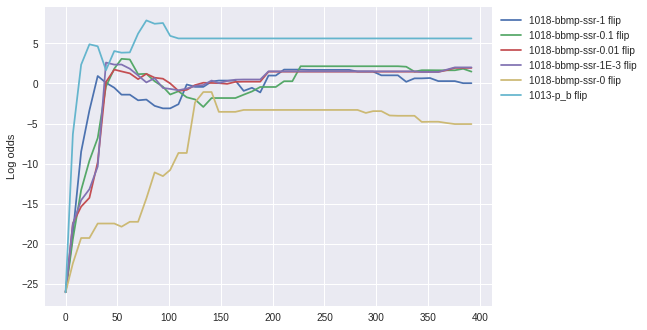

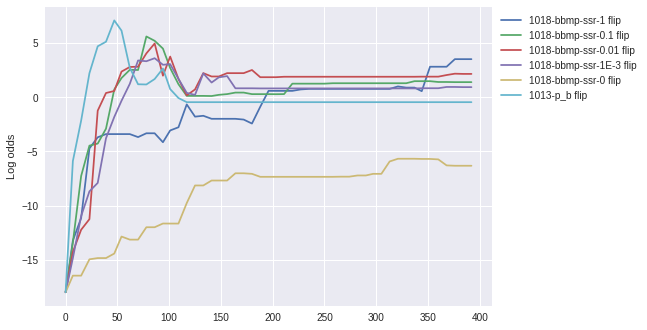

In [20]:
for idx in xrange(20):
    fig, ax = plt.subplots()
    for name in [
#         '1018-bbmp-sdr-1E-1/8_{}_records.th'.format(idx),
        '1018-bbmp-ssr-1/8_{}_records.th'.format(idx),
        '1018-bbmp-ssr-0.1/8_{}_records.th'.format(idx),
        '1018-bbmp-ssr-0.01/8_{}_records.th'.format(idx),
        '1018-bbmp-ssr-1E-3/8_{}_records.th'.format(idx),
        '1018-bbmp-ssr-0/8_{}_records.th'.format(idx),
#         '1018-bbmp-sdr-0/8_{}_records.th'.format(idx),
#         '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## VD - SSR

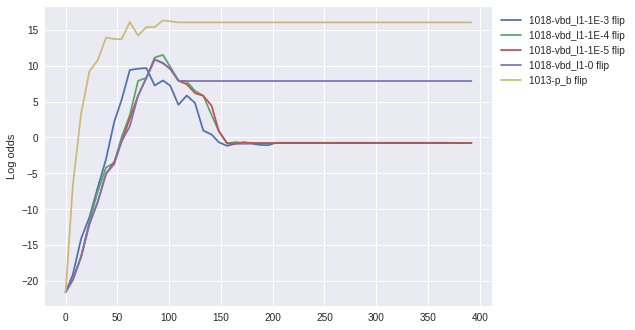

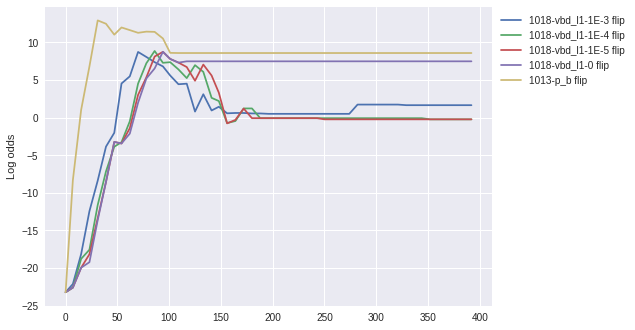

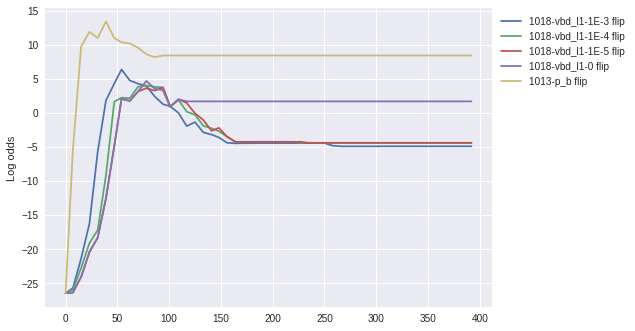

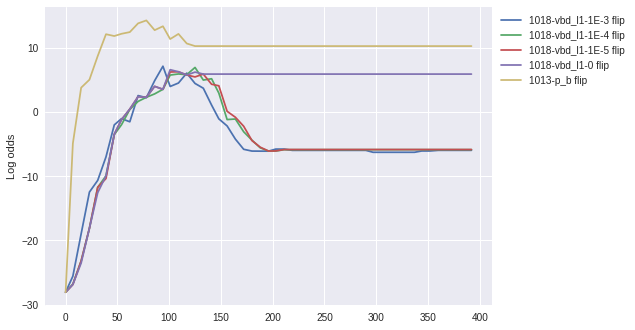

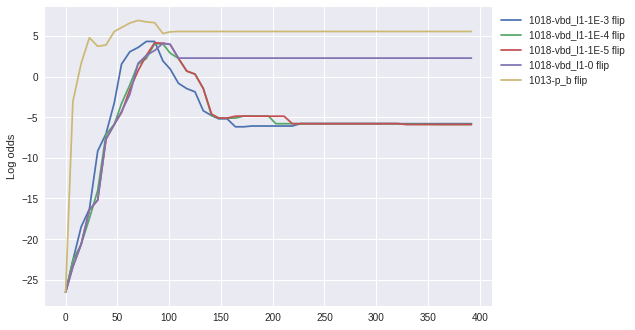

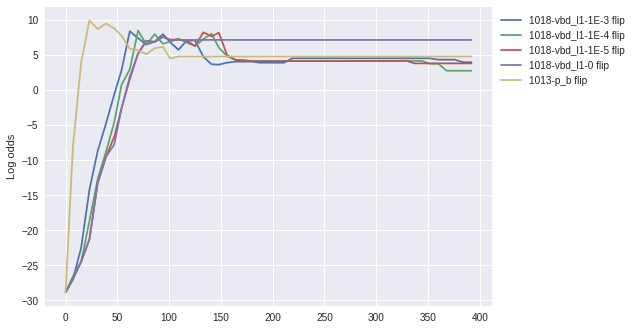

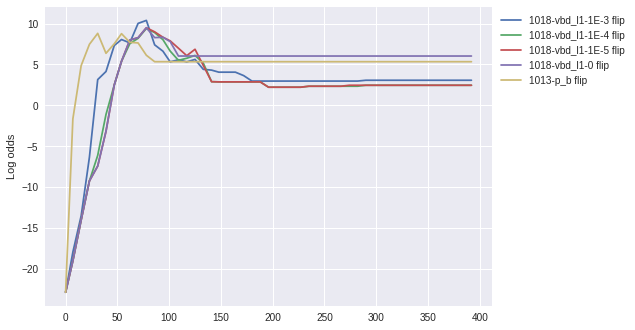

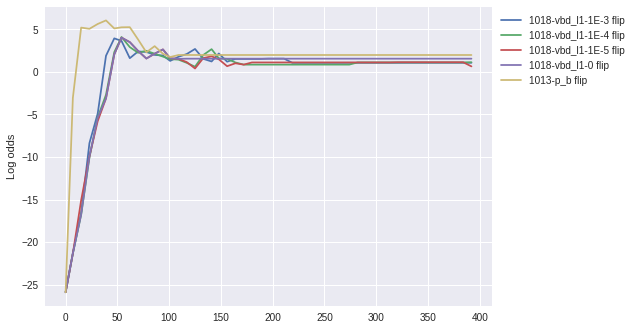

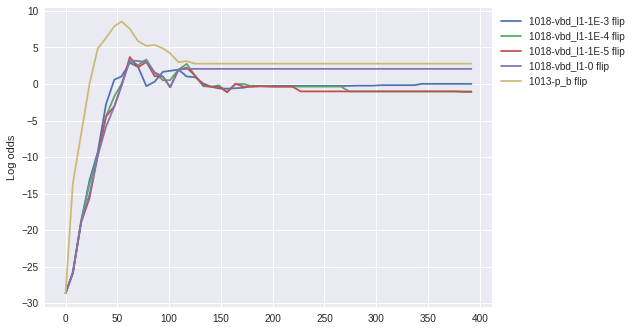

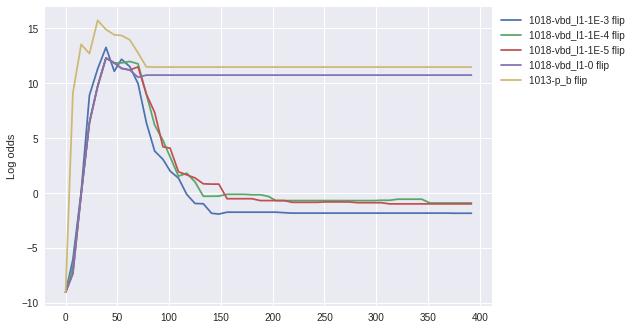

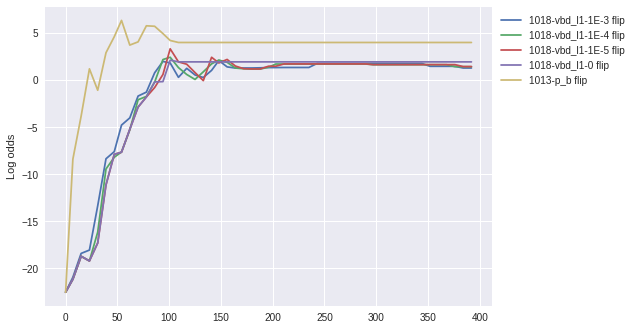

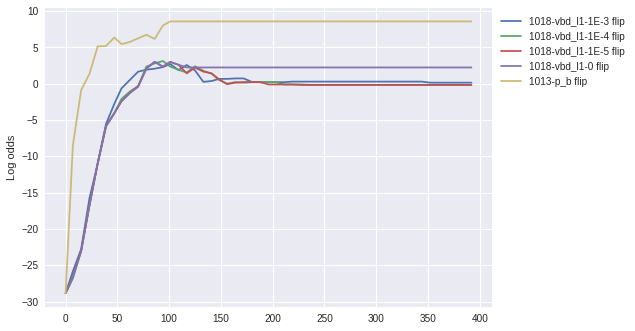

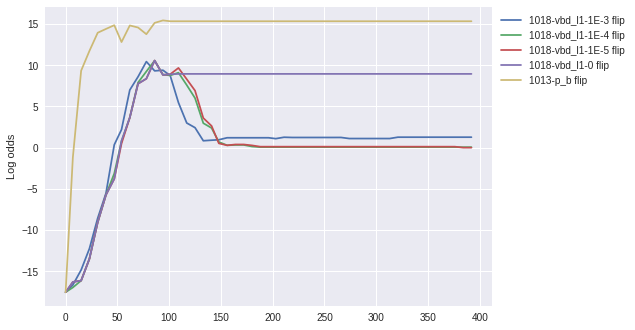

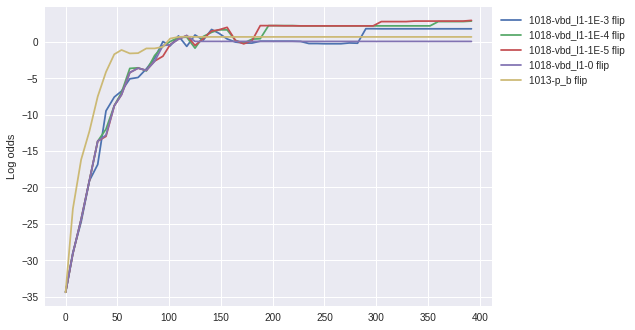

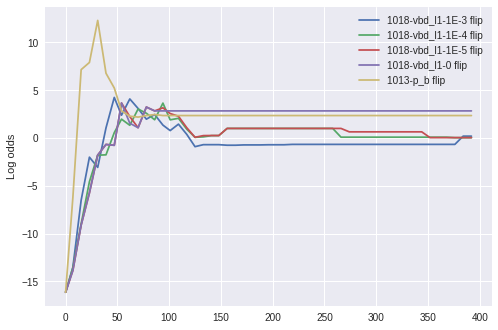

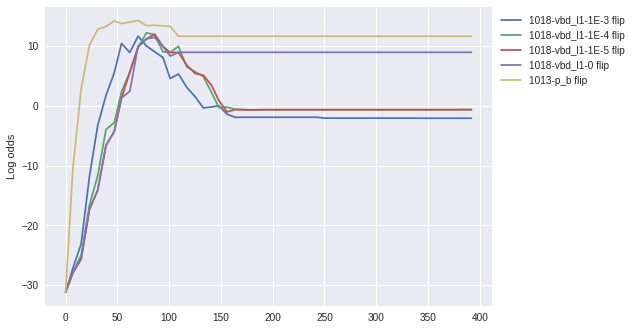

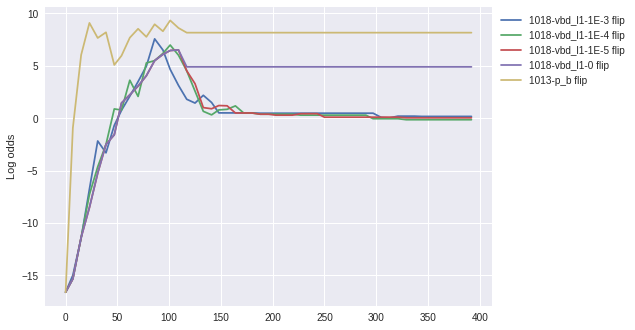

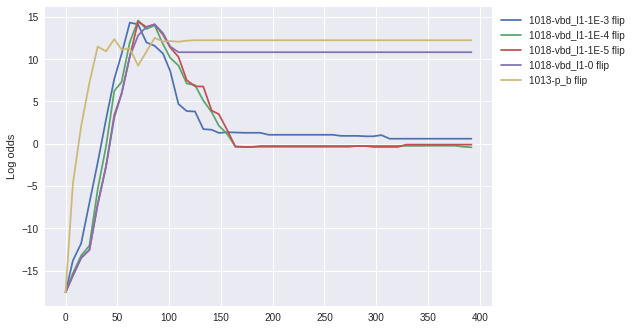

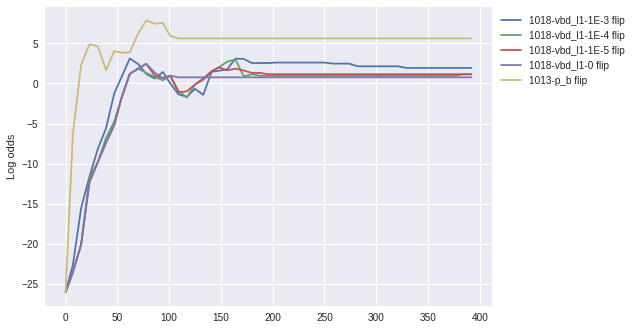

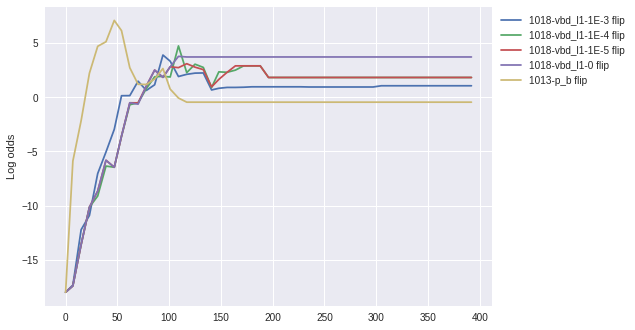

In [32]:
for idx in xrange(20):
    fig, ax = plt.subplots()
    for name in [
#         '1018-bbmp-sdr-1E-1/8_{}_records.th'.format(idx),
        '1018-vbd_l1-1E-3/8_{}_records.th'.format(idx),
        '1018-vbd_l1-1E-4/8_{}_records.th'.format(idx),
        '1018-vbd_l1-1E-5/8_{}_records.th'.format(idx),
        '1018-vbd_l1-0/8_{}_records.th'.format(idx),
#         '1018-bbmp-sdr-0/8_{}_records.th'.format(idx),
#         '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

# Flip one experiment!

## VD - SDR
1E-5 still running

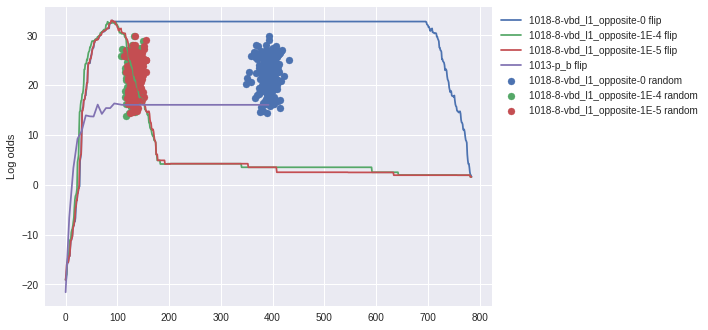

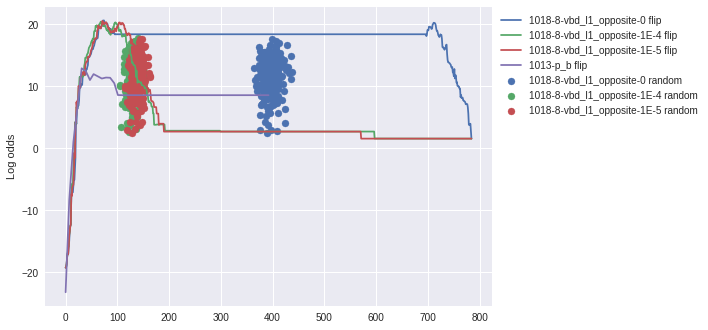

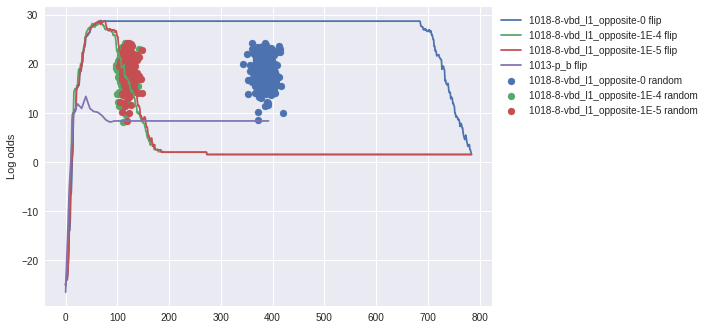

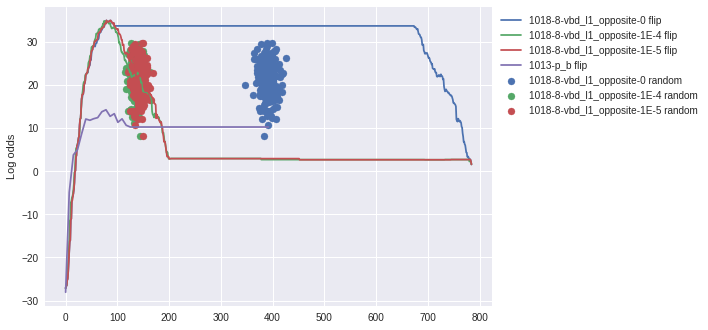

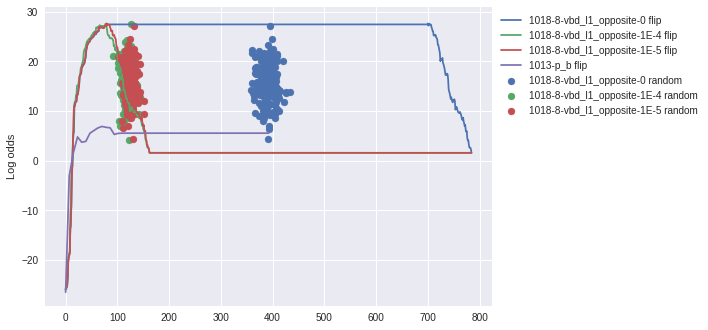

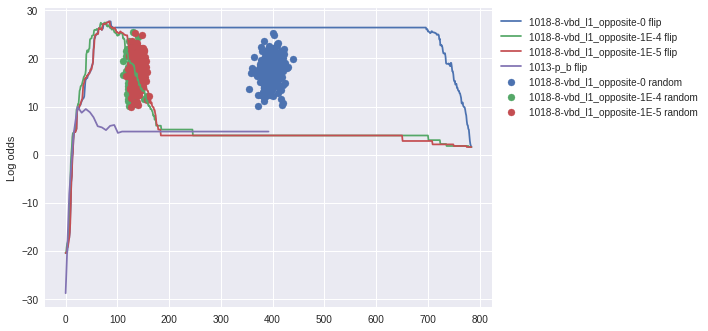

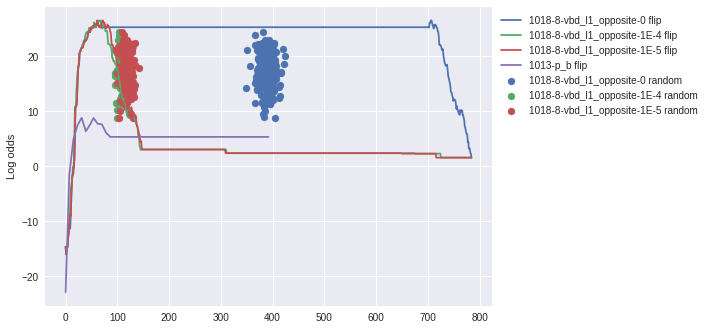

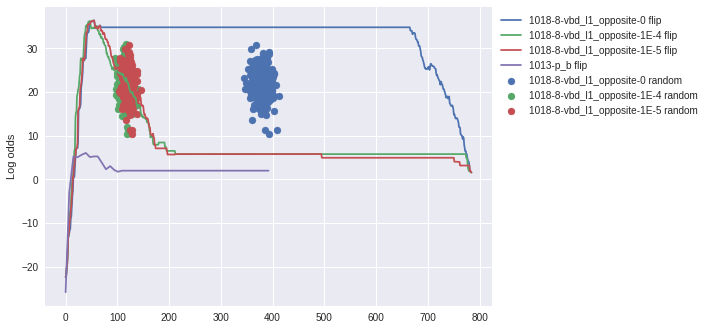

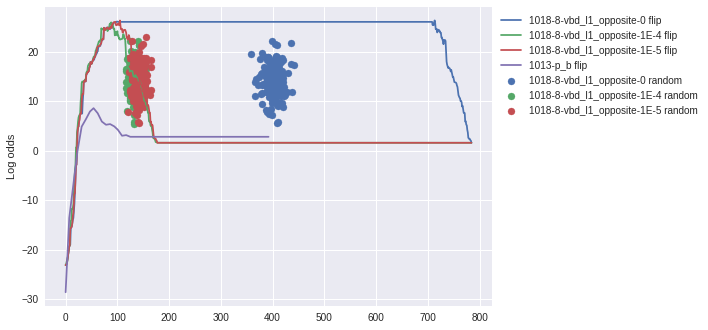

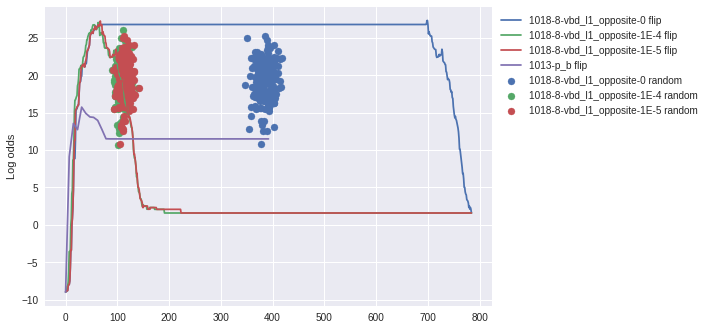

In [8]:
for idx in xrange(10):
    fig, ax = plt.subplots()
    for name in [
#         '1013-vbd_l1_opposite-0.1/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1_opposite-1E-4/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1_opposite-1E-5/8_{}_records.th'.format(idx),
#         '1013-vbd_l1_opposite-1E-5/8_{}_records.th'.format(idx),
#         '1013-vbd_l1_opposite-1E-6/8_{}_records.th'.format(idx),
#         '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        #                  '1013-vbd_opposite-0.5-1.0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## BBMP - SDR

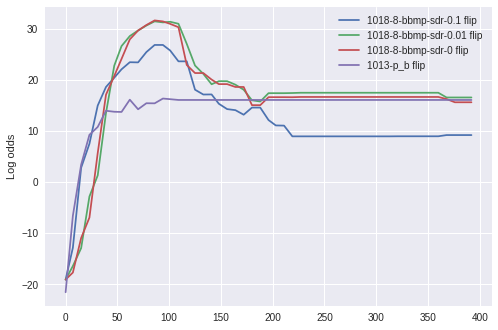

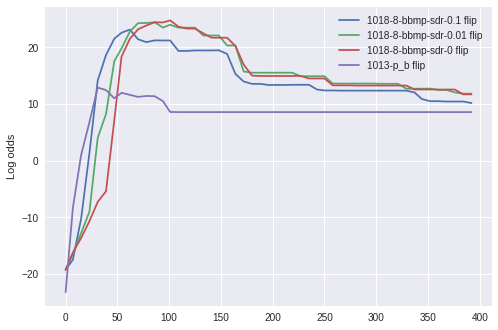

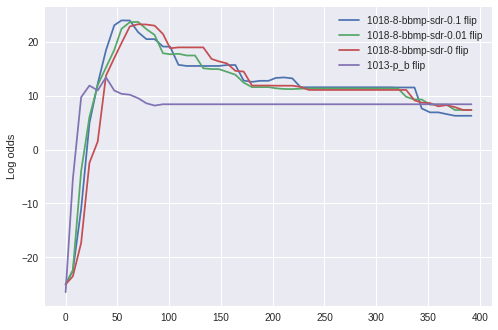

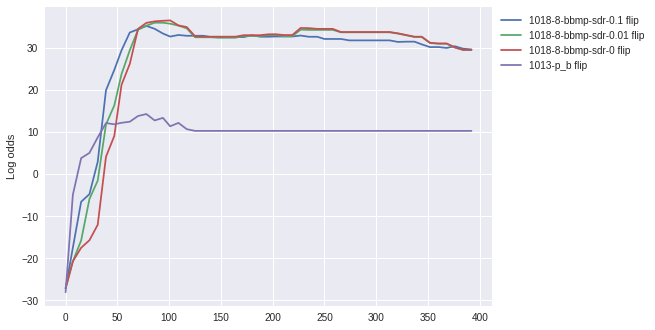

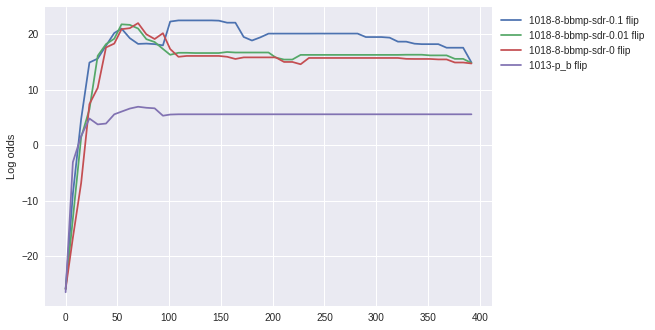

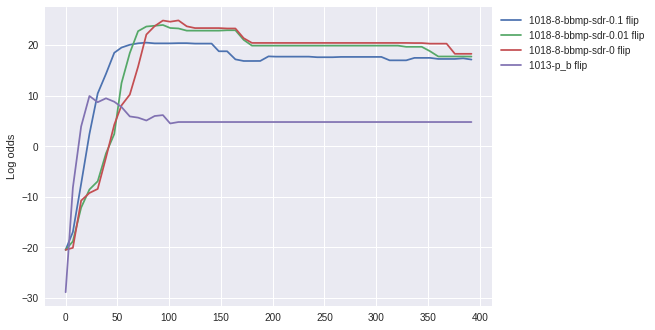

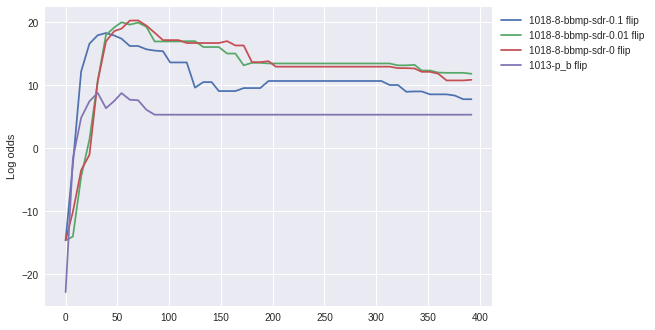

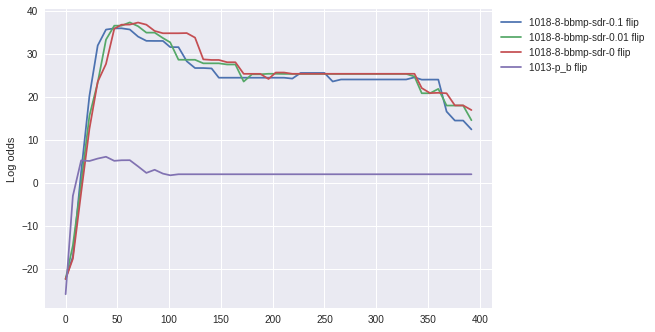

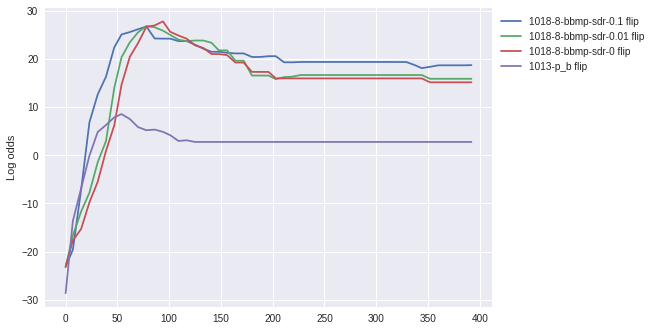

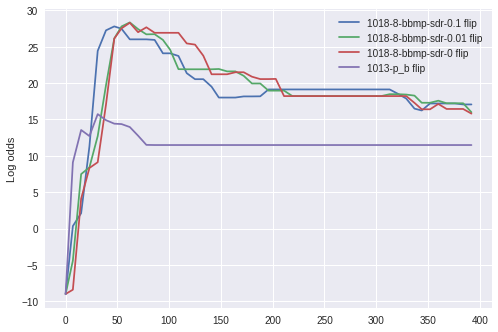

In [40]:
for idx in xrange(10):
    fig, ax = plt.subplots()
    for name in [
#         '1018-8-bbmp-sdr-1/8_{}_records.th'.format(idx),
        '1018-8-bbmp-sdr-0.1/8_{}_records.th'.format(idx),
        '1018-8-bbmp-sdr-0.01/8_{}_records.th'.format(idx),
        '1018-8-bbmp-sdr-0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## VBD - SSR

- 1E-5 still running
- 0 seems the best

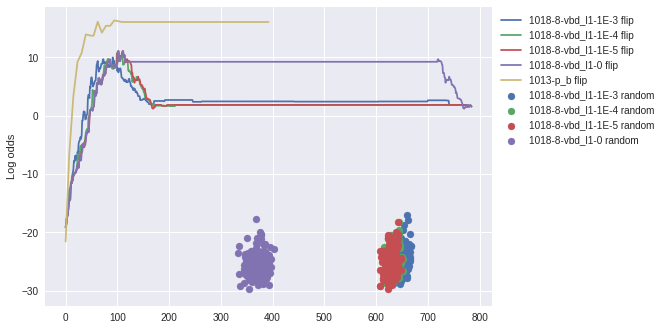

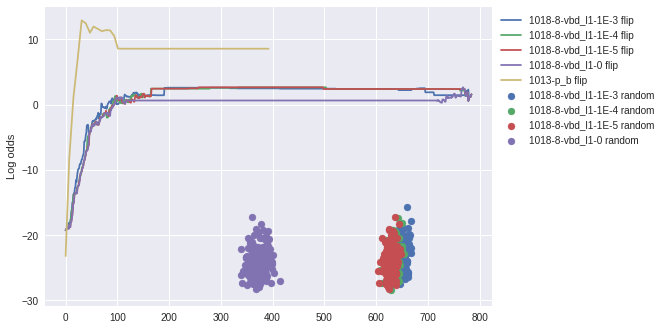

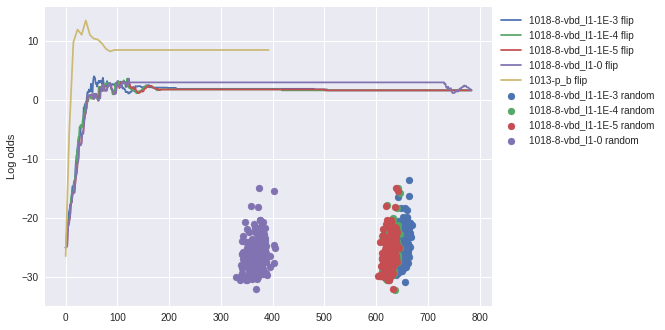

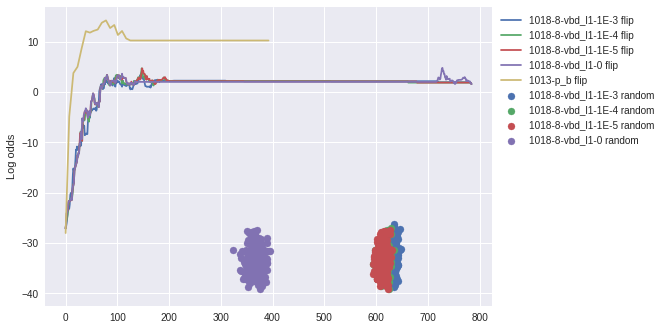

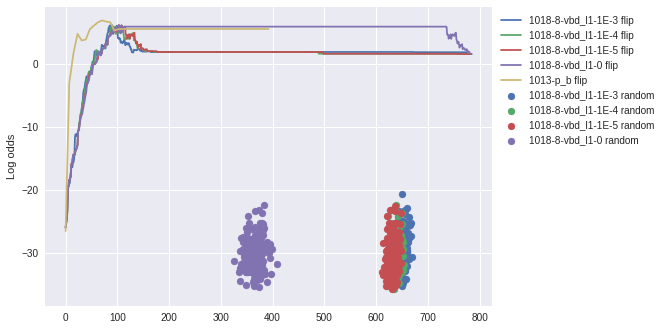

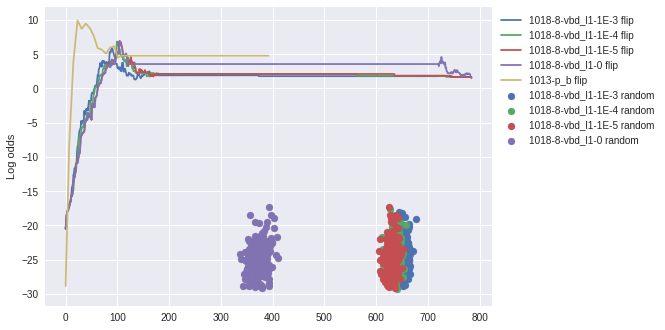

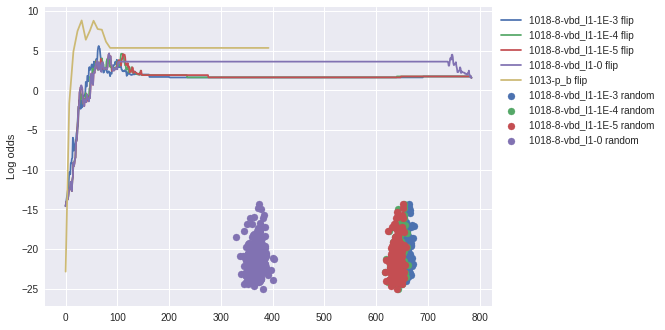

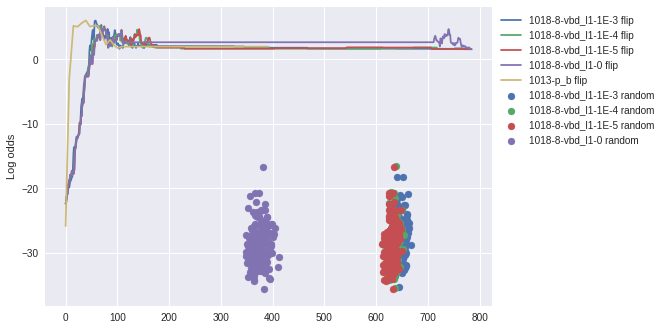

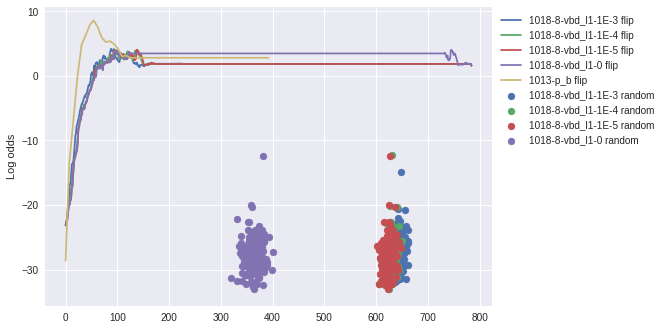

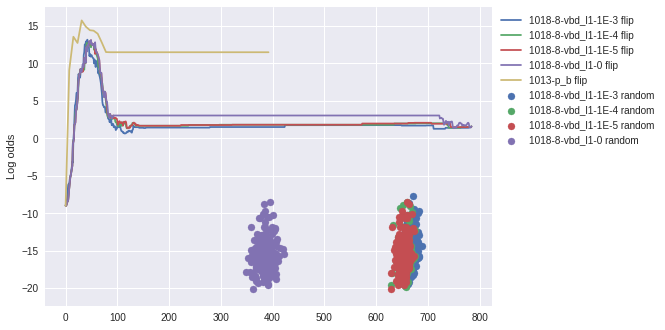

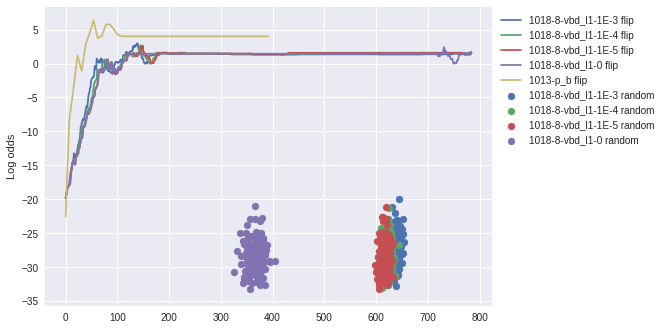

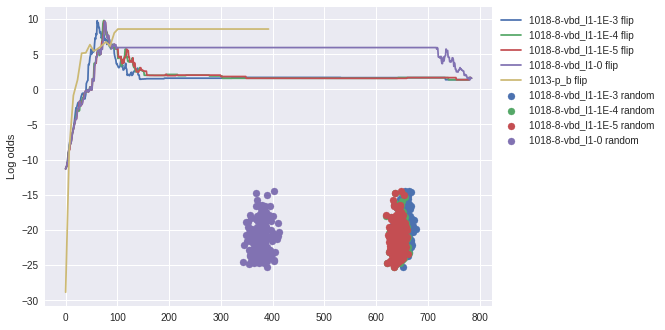

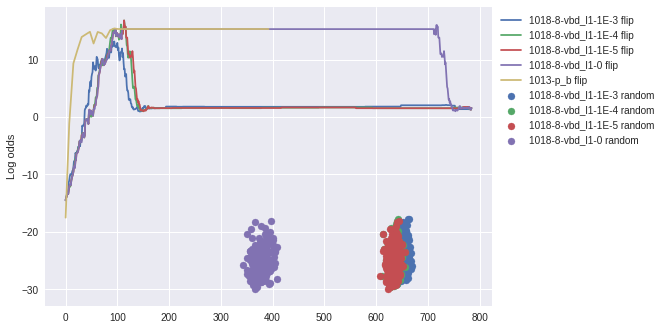

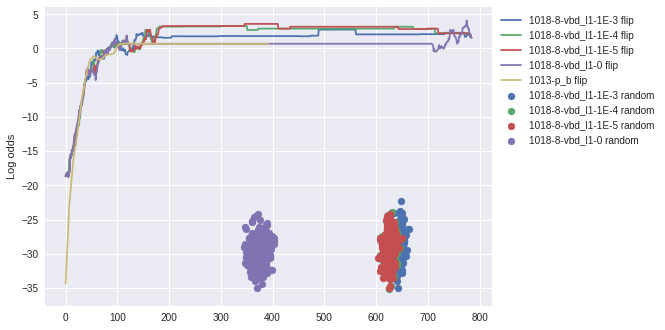

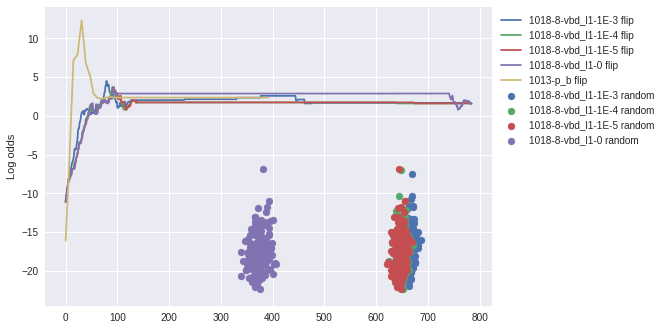

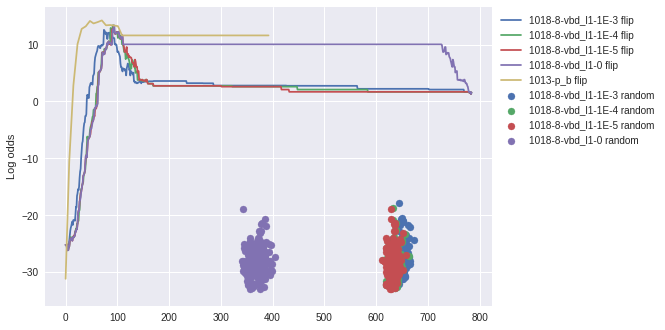

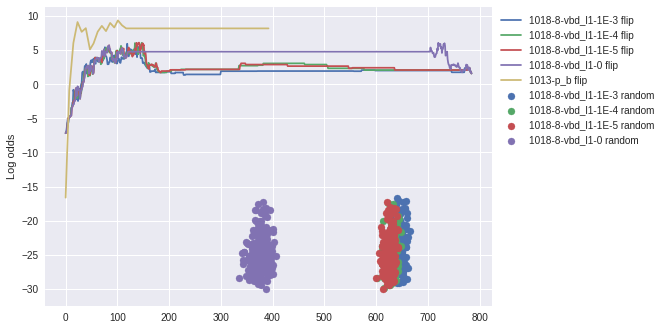

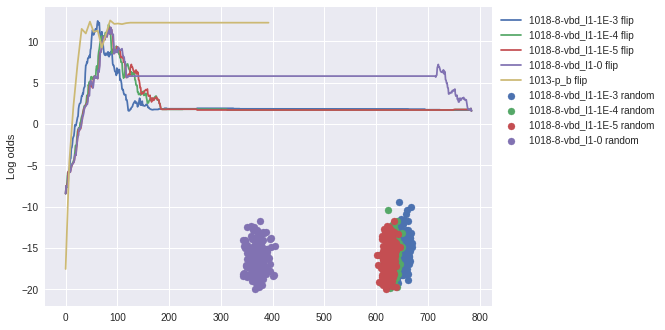

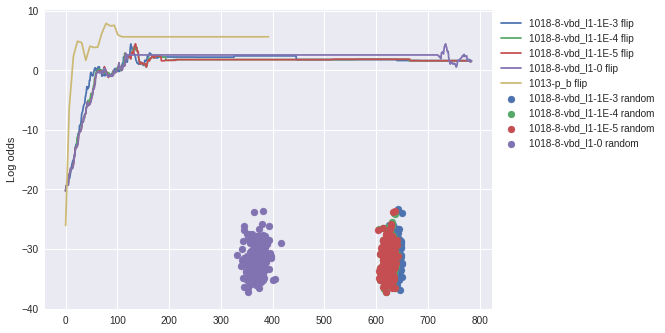

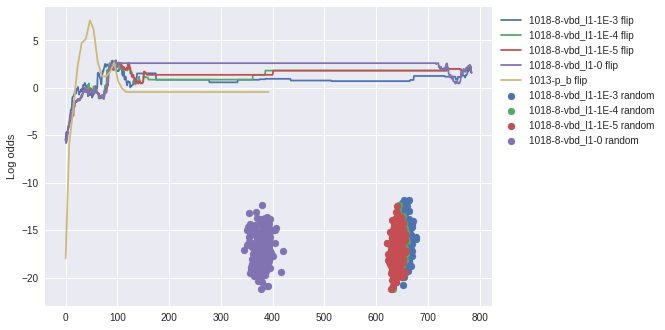

In [7]:
for idx in xrange(20):
    fig, ax = plt.subplots()
    for name in [
#         '1018-bbmp-sdr-1E-1/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1-1E-3/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1-1E-4/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1-1E-5/8_{}_records.th'.format(idx),
        '1018-8-vbd_l1-0/8_{}_records.th'.format(idx),
#         '1018-bbmp-sdr-0/8_{}_records.th'.format(idx),
#         '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## BBMP - SSR
- 0.01 seems the best

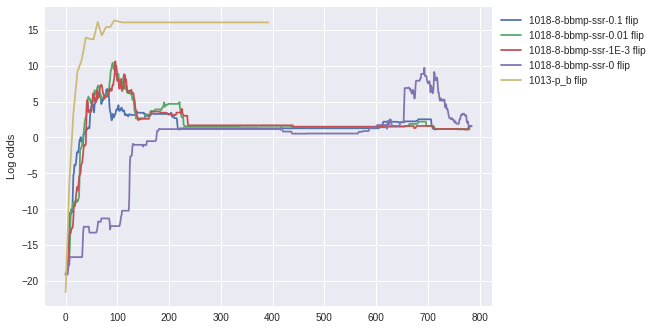

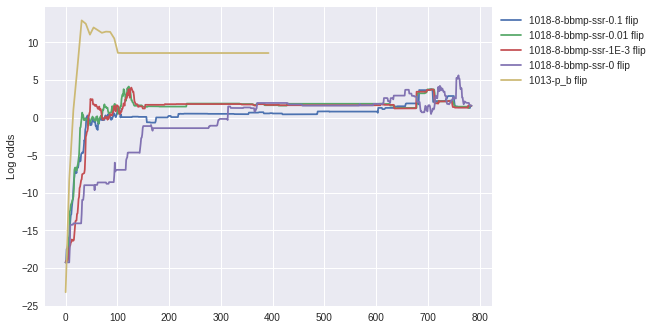

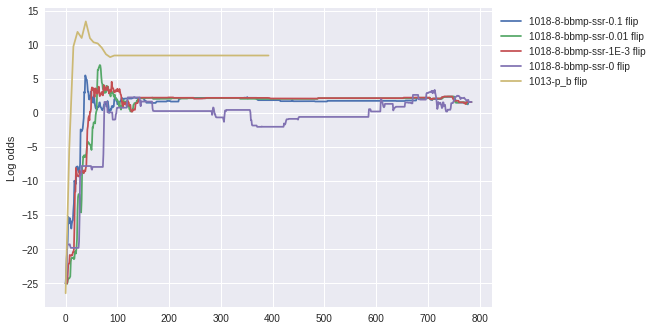

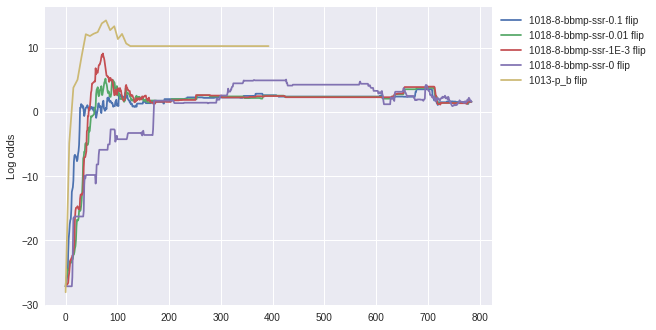

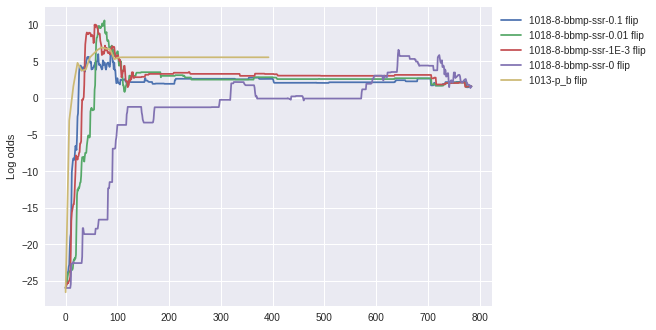

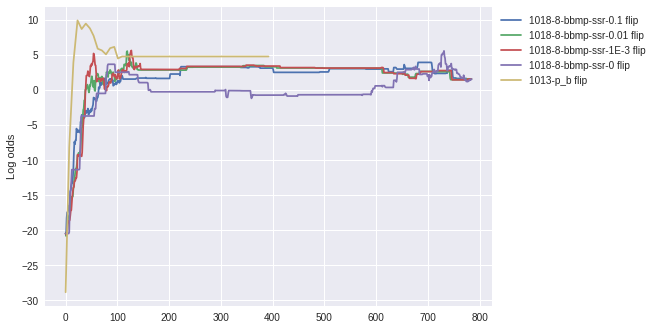

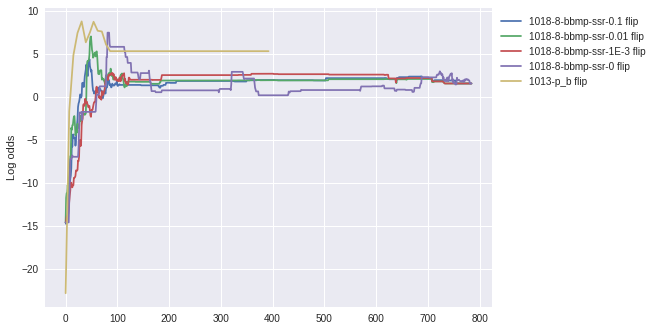

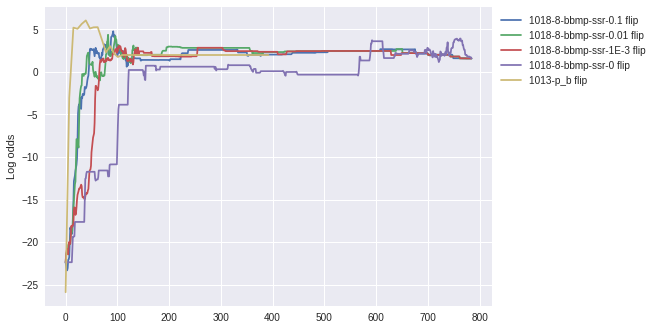

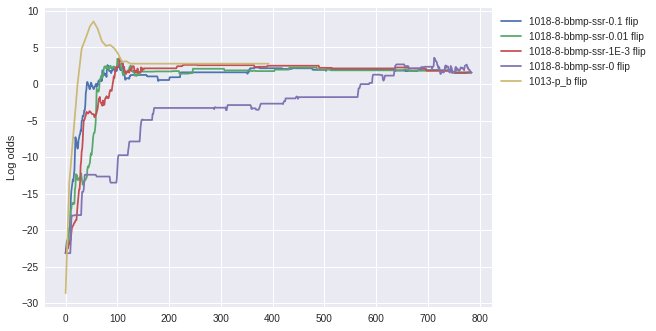

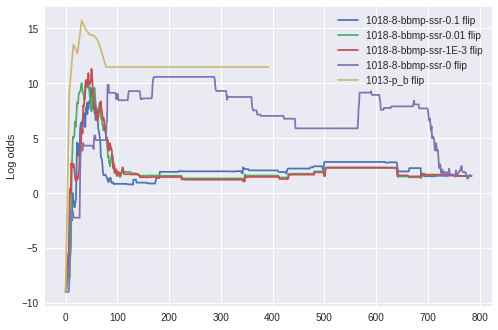

In [45]:
for idx in xrange(10):
    fig, ax = plt.subplots()
    for name in [
#         '1018-8-bbmp-ssr-1/8_{}_records.th'.format(idx),
        '1018-8-bbmp-ssr-0.1/8_{}_records.th'.format(idx),
        '1018-8-bbmp-ssr-0.01/8_{}_records.th'.format(idx),
        '1018-8-bbmp-ssr-1E-3/8_{}_records.th'.format(idx),
        '1018-8-bbmp-ssr-0/8_{}_records.th'.format(idx),
        '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()